In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [130]:
with open('cfi_daily_1966-2008.txt', 'r') as file:
    a = file.readlines()
    lst = []
    for i in a:
        lst.append(i.split())

lst = lst[1:]

# time | offset | JD | North | South | Total
df = {"Time (day)": [], "offset": [],
     "JD": [], "North": [], 
     "South": [], "Total": []}


for row in lst:
    if len(row) != 6:
        continue
    df["Time (day)"].append(row[0])
    df["offset"].append(row[1])
    df["JD"].append(float(row[2]))
    df["North"].append(float(row[3]))
    df["South"].append(float(row[4]))
    df["Total"].append(float(row[5]))


cfi_daily = pd.DataFrame(df)
cfi_daily

,Time (day),offset,JD,North,South,Total
0,1-Jan-66,1,2439126.5,0.0,0.0,0.0
1,2-Jan-66,2,2439127.5,0.0,0.0,0.0
2,3-Jan-66,3,2439128.5,0.0,0.0,0.0
3,4-Jan-66,4,2439129.5,0.0,0.0,0.0
4,5-Jan-66,5,2439130.5,0.0,0.0,0.0
...,...,...,...,...,...,...
15685,27-Dec-08,15702,2454827.5,0.0,0.0,0.0
15686,28-Dec-08,15703,2454828.5,0.0,0.0,0.0
15687,29-Dec-08,15704,2454829.5,0.0,0.0,0.0
15688,30-Dec-08,15705,2454830.5,0.0,0.0,0.0


In [131]:
cfi_daily['JD_standardized'] = (cfi_daily['JD'] - cfi_daily['JD'].mean()) / cfi_daily['JD'].std()
cfi_daily['North_standardized'] = (cfi_daily['North'] - cfi_daily['North'].mean()) / cfi_daily['North'].std()
cfi_daily['South_standardized'] = (cfi_daily['South'] - cfi_daily['South'].mean()) / cfi_daily['South'].std()
cfi_daily['Total_standardized'] = (cfi_daily['Total'] - cfi_daily['Total'].mean()) / cfi_daily['Total'].std()
cfi_daily

,Time (day),offset,JD,North,South,Total,JD_standardized,North_standardized,South_standardized,Total_standardized
0,1-Jan-66,1,2439126.5,0.0,0.0,0.0,-1.731258,-0.482457,-0.492748,-0.641209
1,2-Jan-66,2,2439127.5,0.0,0.0,0.0,-1.731037,-0.482457,-0.492748,-0.641209
2,3-Jan-66,3,2439128.5,0.0,0.0,0.0,-1.730817,-0.482457,-0.492748,-0.641209
3,4-Jan-66,4,2439129.5,0.0,0.0,0.0,-1.730596,-0.482457,-0.492748,-0.641209
4,5-Jan-66,5,2439130.5,0.0,0.0,0.0,-1.730376,-0.482457,-0.492748,-0.641209
...,...,...,...,...,...,...,...,...,...,...
15685,27-Dec-08,15702,2454827.5,0.0,0.0,0.0,1.729945,-0.482457,-0.492748,-0.641209
15686,28-Dec-08,15703,2454828.5,0.0,0.0,0.0,1.730166,-0.482457,-0.492748,-0.641209
15687,29-Dec-08,15704,2454829.5,0.0,0.0,0.0,1.730386,-0.482457,-0.492748,-0.641209
15688,30-Dec-08,15705,2454830.5,0.0,0.0,0.0,1.730607,-0.482457,-0.492748,-0.641209


In [132]:
with open('sunspots.cycle.maximum-minimum.txt', 'r') as file:
    a = file.readlines()
    lst = []
    for i in a:
        lst.append(i.split())

lst = lst[14:]

# Sunspot Cycle Number | Year of Min | Smallest Smoothed Montly Mean | Year of Max | Largest Smoothed Montly Mean | Rise to the Max (Yrs) | 
# Fall to the Min (Yrs) | Cycle Lenght Years | 
df = {"Sunspot Cycle Number": [], "Year of Min": [],
     "Smallest Smoothed Montly Mean": [], "Year of Max": [], 
     "Largest Smoothed Montly Mean": [], "Rise to the Max (Yrs)": [], 
      "Fall to the Min (Yrs)": [], "Cycle Lenght Years": []}


for row in lst:
    df["Sunspot Cycle Number"].append(int(row[0]))
    df["Year of Min"].append(float(row[1]))
    df["Smallest Smoothed Montly Mean"].append(float(row[2]))
    df["Year of Max"].append(float(row[3]))
    df["Largest Smoothed Montly Mean"].append(float(row[4]))
    df["Rise to the Max (Yrs)"].append(float(row[5]))
    df["Fall to the Min (Yrs)"].append(float(row[6]))
    df["Cycle Lenght Years"].append(float(row[7]))

sunspots_cycle = pd.DataFrame(df)
sunspots_cycle

,Sunspot Cycle Number,Year of Min,Smallest Smoothed Montly Mean,Year of Max,Largest Smoothed Montly Mean,Rise to the Max (Yrs),Fall to the Min (Yrs),Cycle Lenght Years
0,1,1755.2,8.4,1761.5,86.5,6.3,5.0,11.3
1,2,1766.5,11.2,1769.7,115.8,3.2,5.8,9.0
2,3,1775.5,7.2,1778.4,158.5,2.9,6.3,9.2
3,4,1784.7,9.5,1788.1,141.2,3.4,10.2,13.6
4,5,1798.3,3.2,1805.2,49.2,6.9,5.4,12.3
5,6,1810.6,0.0,1816.4,48.7,5.8,6.9,12.7
6,7,1823.3,0.1,1829.9,71.7,6.6,4.0,10.6
7,8,1833.9,7.3,1837.2,146.9,3.3,6.3,9.6
8,9,1843.5,10.5,1848.1,131.6,4.6,7.9,12.5
9,10,1856.0,3.2,1860.1,97.9,4.1,7.1,11.2


In [133]:
sunspots_cycle.info()
# I ran this line to see if the code change the integers into floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sunspot Cycle Number           23 non-null     int64  
 1   Year of Min                    23 non-null     float64
 2   Smallest Smoothed Montly Mean  23 non-null     float64
 3   Year of Max                    23 non-null     float64
 4   Largest Smoothed Montly Mean   23 non-null     float64
 5   Rise to the Max (Yrs)          23 non-null     float64
 6   Fall to the Min (Yrs)          23 non-null     float64
 7   Cycle Lenght Years             23 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 1.6 KB


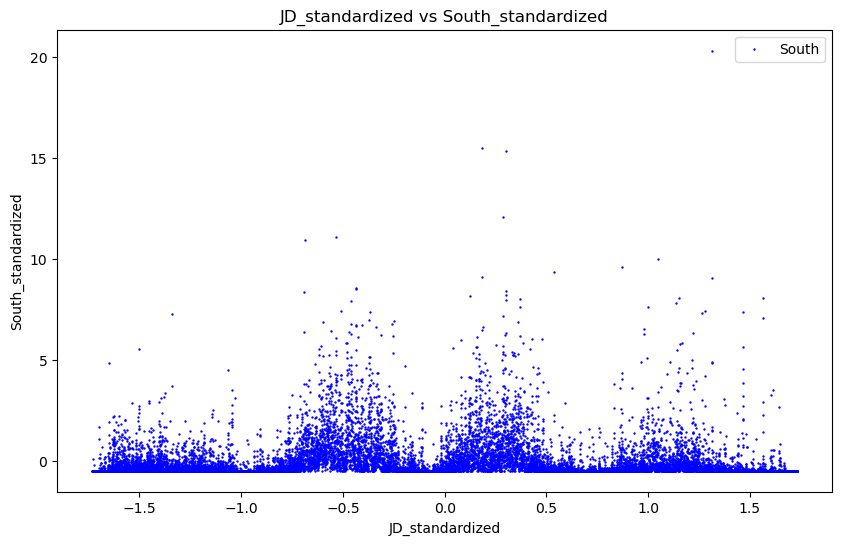

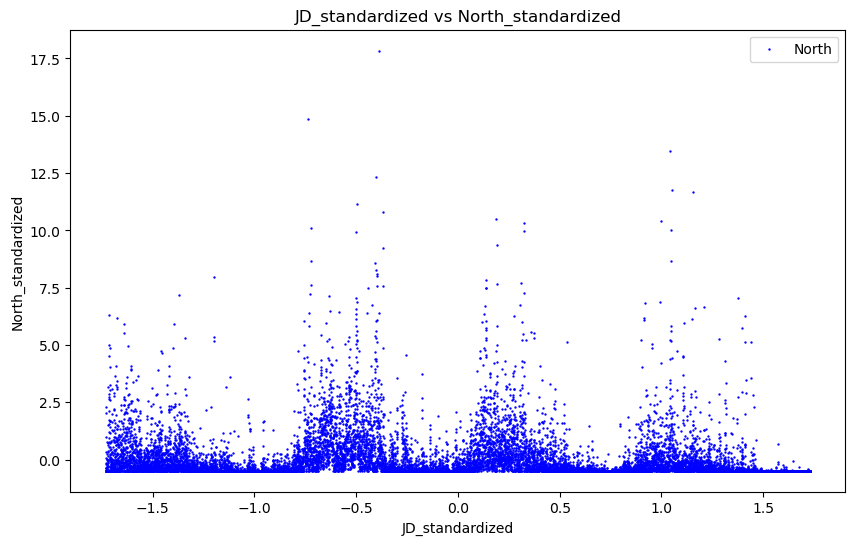

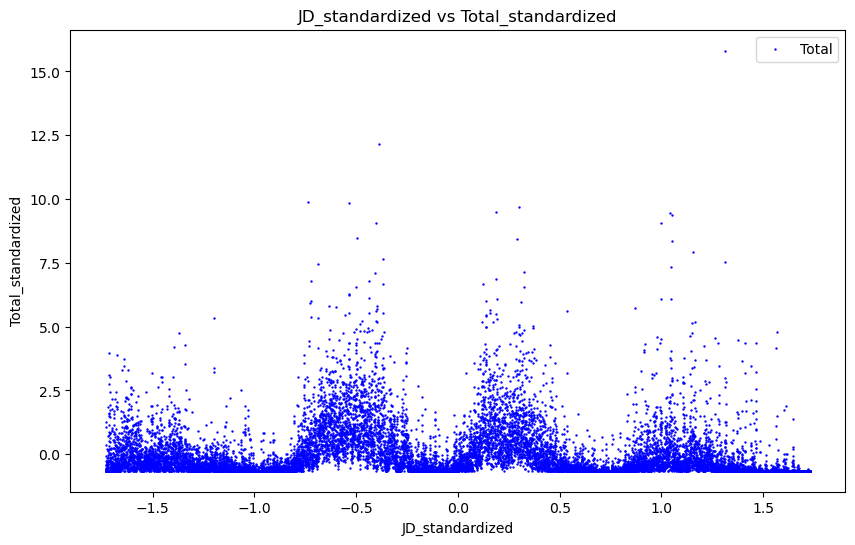

In [138]:
#Standarzed Model

plt.style.use('default')
#I tried putting in on dark mode but it didnt work lol, it looked ugly and i didnt know how to make it look nicer

#plt.style.use('dark_background')
#fig, ax = plt.subplots()

plt.figure(figsize=(10, 6), frameon = False)
plt.scatter(cfi_daily['JD_standardized'], cfi_daily['South_standardized'], label='South', color = 'blue', s = 0.5)
plt.xlabel('JD_standardized')
plt.ylabel('South_standardized')
plt.title('JD_standardized vs South_standardized')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6),  frameon = False)
plt.scatter(cfi_daily['JD_standardized'], cfi_daily['North_standardized'], label='North', color = 'blue', s = 0.5)
plt.xlabel('JD_standardized')
plt.ylabel('North_standardized')
plt.title('JD_standardized vs North_standardized')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6),  frameon = False)
plt.scatter(cfi_daily['JD_standardized'], cfi_daily['Total_standardized'], label='Total', color = 'blue', s = 0.5)
plt.xlabel('JD_standardized')
plt.ylabel('Total_standardized')
plt.title('JD_standardized vs Total_standardized')
plt.legend()
plt.show()

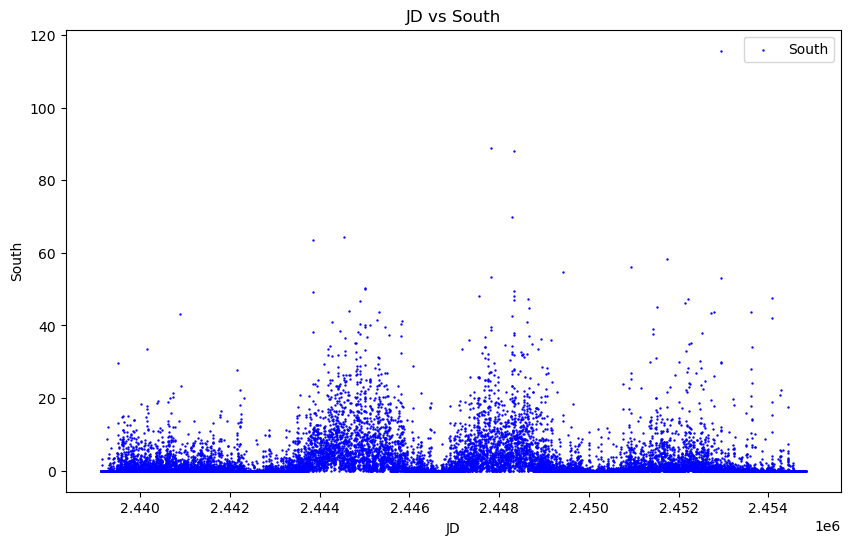

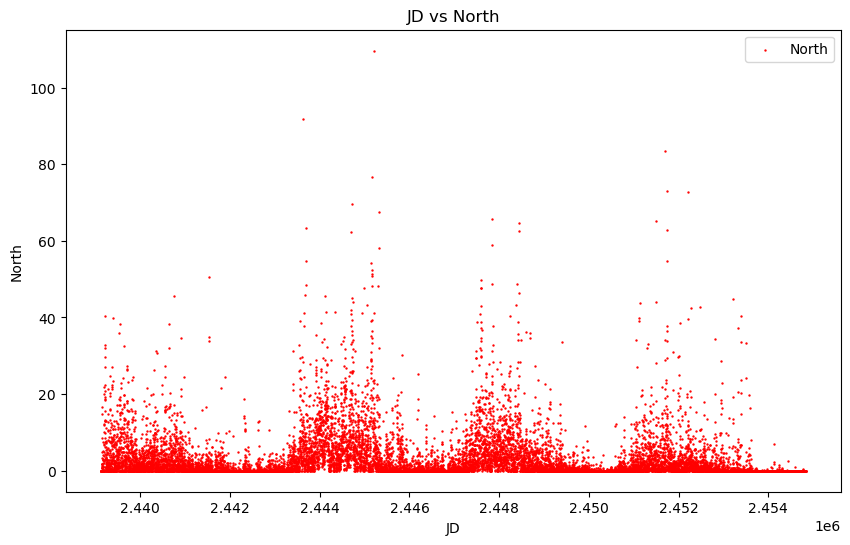

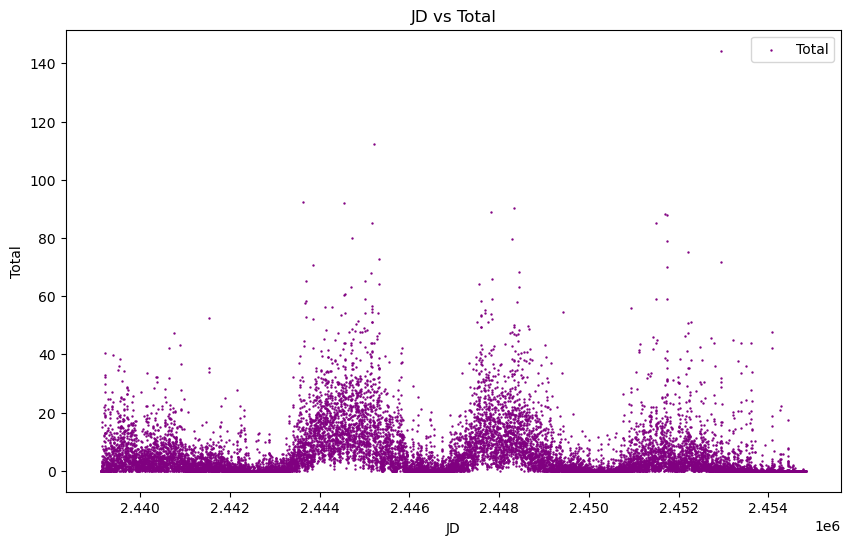

In [135]:
#Unstandarized Model

plt.figure(figsize=(10, 6), frameon = False)
plt.scatter(cfi_daily['JD'], cfi_daily['South'], label='South', color = 'blue', s = 0.5)
plt.xlabel('JD')
plt.ylabel('South')
plt.title('JD vs South')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6),  frameon = False)
plt.scatter(cfi_daily['JD'], cfi_daily['North'], label='North', color = 'red', s = 0.5)
plt.xlabel('JD')
plt.ylabel('North')
plt.title('JD vs North')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6),  frameon = False)
plt.scatter(cfi_daily['JD'], cfi_daily['Total'], label='Total', color = 'Purple', s = 0.5)
plt.xlabel('JD')
plt.ylabel('Total')
plt.title('JD vs Total')
plt.legend()
plt.show()


#Analysis 

# it looks the graphs show that the peak of solar flare activity repeats approximately every 0.004e6 Julian Years  
# which is 4000 Julian days. 4000 julian days are approximately 10.95 earth years
# which means every 11 years we have a peak in solar flare activy.
# with this graph we my predict the next peak in solar flare activity
# which coincides with the number of years in which the sun changes poles. 
# We can conclude that every time the sun changes poles, we can predict solar flare activity ignoring other factors

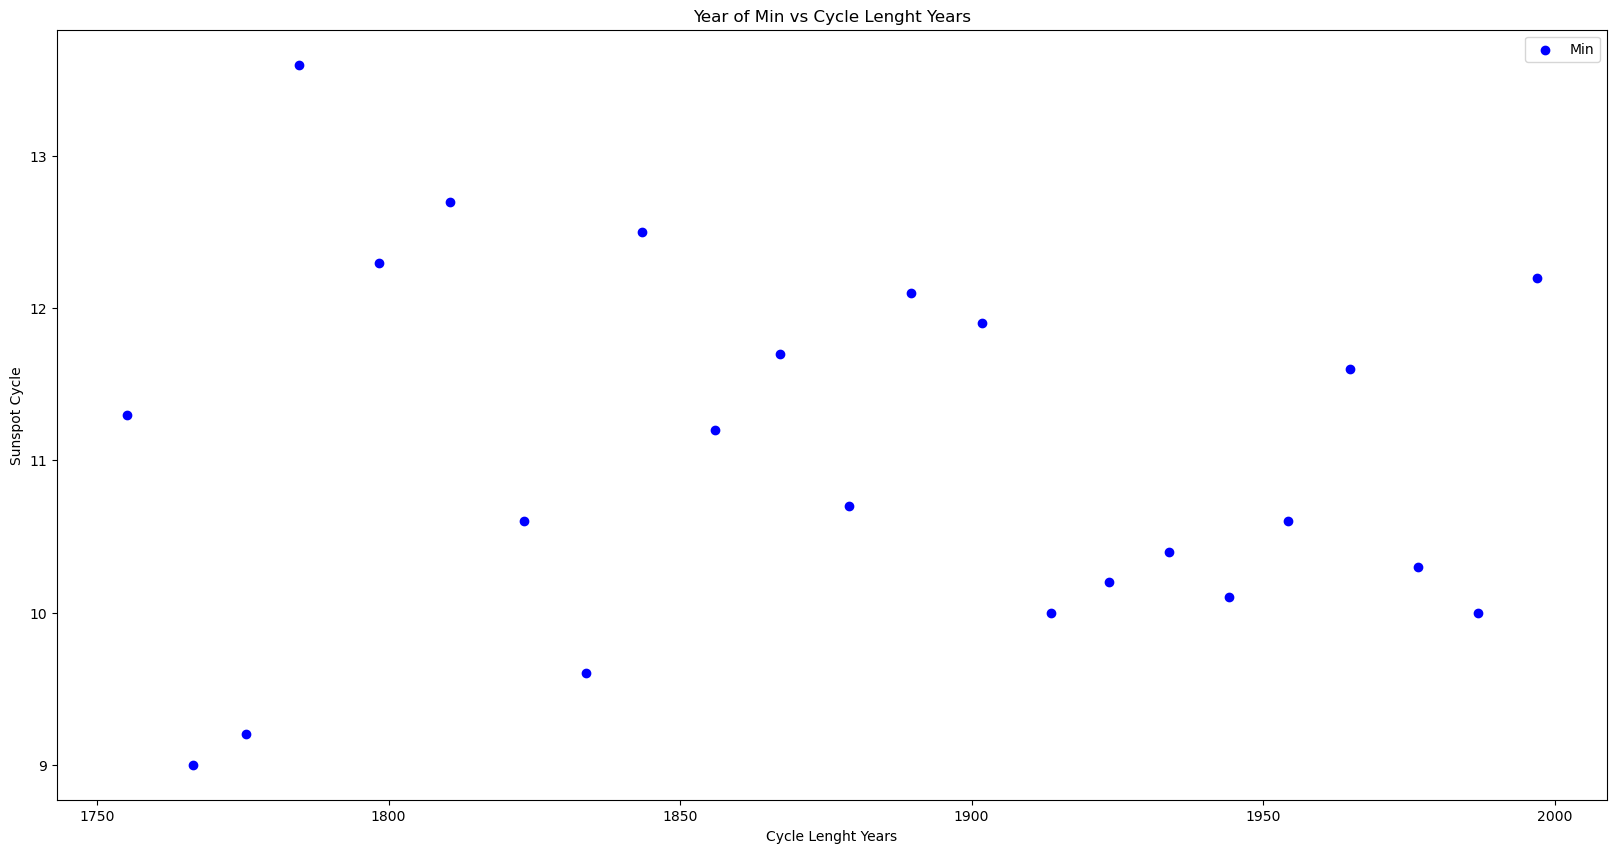

In [136]:
plt.figure(figsize=(20, 10), frameon = False)
plt.scatter(sunspots_cycle['Year of Min'], sunspots_cycle['Cycle Lenght Years'], label='Min', color = 'blue')
plt.xlabel('Cycle Lenght Years')
plt.ylabel('Sunspot Cycle')
plt.title('Year of Min vs Cycle Lenght Years')
plt.legend()
plt.show()

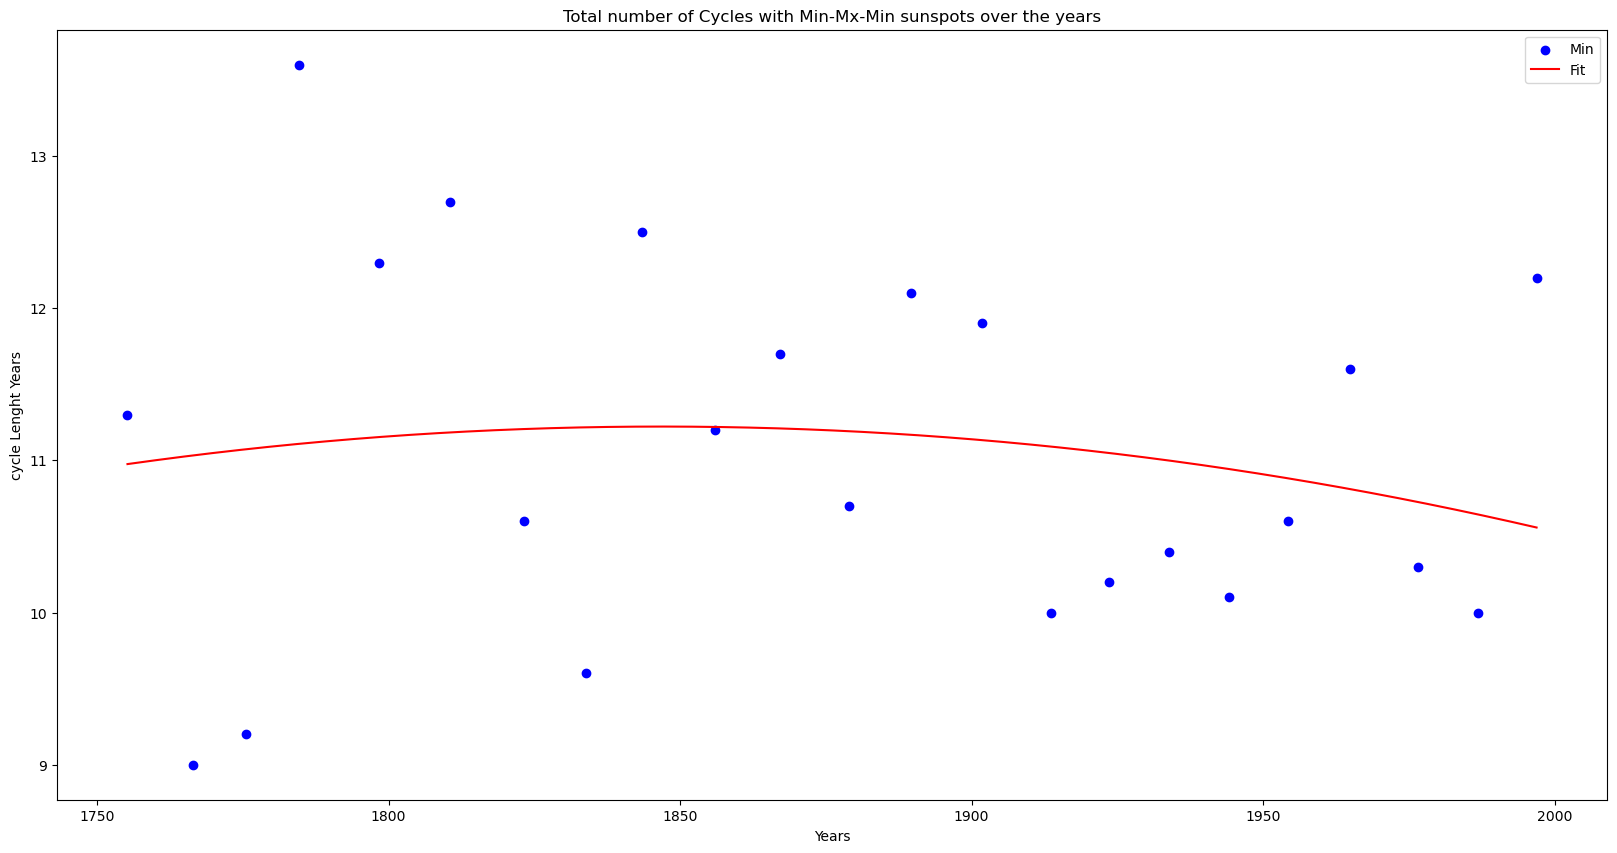

In [137]:
plt.figure(figsize=(20, 10), frameon = False)
plt.scatter(sunspots_cycle['Year of Min'], sunspots_cycle['Cycle Lenght Years'], label='Min', color = 'blue')
coefficients = np.polyfit(sunspots_cycle['Year of Min'], sunspots_cycle['Cycle Lenght Years'], 2)
x_smooth = np.linspace(sunspots_cycle['Year of Min'].min(), sunspots_cycle['Year of Min'].max(), 500)
y_smooth = np.polyval(coefficients, x_smooth)
plt.plot(x_smooth, y_smooth, color='red', label='Fit')
plt.xlabel('Years')
plt.ylabel('cycle Lenght Years')
plt.title('Total number of Cycles with Min-Mx-Min sunspots over the years')
plt.legend()
plt.show()

#Analysis

# the number of cycles where there is a Min-Mx-Min of suspots over the years varies overtime.
# With this data, it is hard to predict when we will have maximun number of sunspots
# or when we will have miniun number of sunspots